In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
#Loading NLTK
import nltk
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer

In [21]:
from nltk.util import ngrams
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.metrics import classification_report,confusion_matrix

In [16]:
from collections import defaultdict
from collections import Counter
plt.style.use('ggplot')
stop=set(stopwords.words('english'))

import re
import string

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [3]:
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


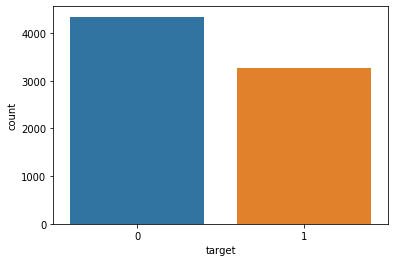

In [5]:
sns.countplot(x='target',data = train_df) 

In [7]:
def length(text):
    return len(text)

In [8]:
train_df['length'] = train_df['text'].apply(length)
test_df['length'] = test_df['text'].apply(length)

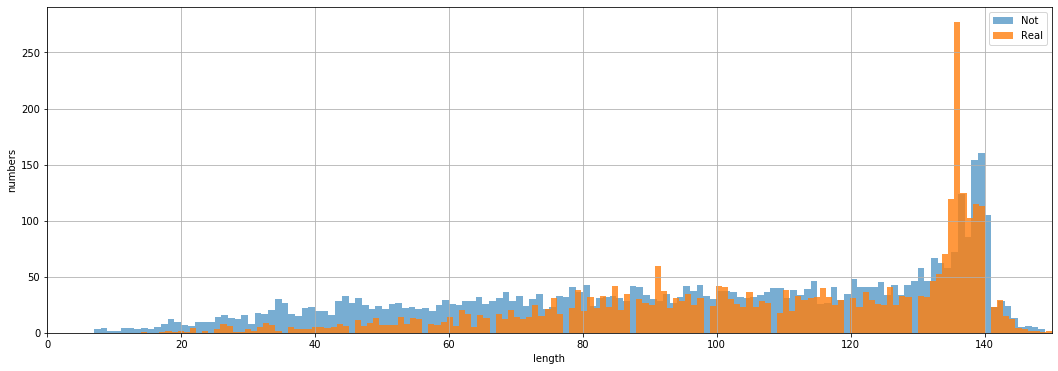

In [9]:
plt.rcParams['figure.figsize'] = (18.0, 6.0)
bins = 150
plt.hist(train_df[train_df['target'] == 0]['length'], alpha = 0.6, bins=bins, label='Not')
plt.hist(train_df[train_df['target'] == 1]['length'], alpha = 0.8, bins=bins, label='Real')
plt.xlabel('length')
plt.ylabel('numbers')
plt.legend(loc='upper right')
plt.xlim(0,150)
plt.grid()
plt.show()

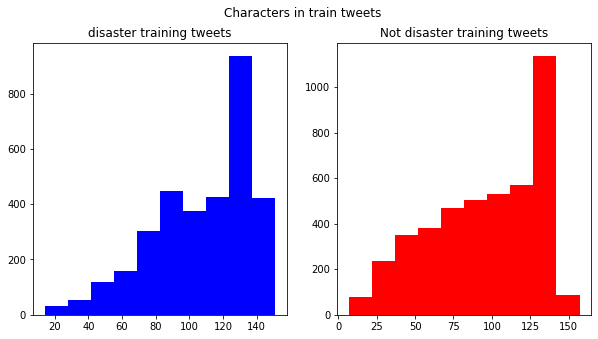

In [11]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
train_df_len=train_df[train_df['target']==1]['text'].str.len()
ax1.hist(train_df_len,color='blue')
ax1.set_title('disaster training tweets')
train_df_len=train_df[train_df['target']==0]['text'].str.len()
ax2.hist(train_df_len,color='red')
ax2.set_title('Not disaster training tweets')
fig.suptitle('Characters in train tweets')
plt.show()

Text(0.5, 0.98, 'Average word length in each train_df')

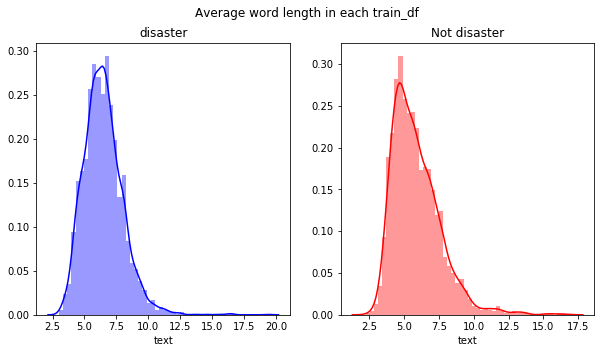

In [12]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5)) #Average Word in Train data
word=train_df[train_df['target']==1]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='blue')
ax1.set_title('disaster')
word=train_df[train_df['target']==0]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='red')
ax2.set_title('Not disaster')
fig.suptitle('Average word length in each train_df')

In [13]:
def create_corpus(target):
    corpus=[]
    
    for x in train_df[train_df['target']==target]['text'].str.split():
        for i in x:
            corpus.append(i)
    return corpus
def create_corpus_df(train_df, target):
    corpus=[]
    
    for x in train_df[train_df['target']==target]['text'].str.split():
        for i in x:
            corpus.append(i)
    return corpus

In [17]:
corpus=create_corpus(0)

dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1
        
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10]
np.array(stop)

array({'s', 'their', 'him', 'it', "doesn't", 'into', 'most', 'me', 'down', 'now', "haven't", 'won', 'here', 'than', 'them', 'up', 'ourselves', 'its', 'your', 'our', 'doing', 'under', "mustn't", 'weren', 'both', 'themselves', 'he', 'which', 'doesn', 'yourselves', 'once', 'these', 'don', "mightn't", "hasn't", 'who', 'this', 'how', 'shan', 'there', 'why', "aren't", 'aren', 'didn', 'is', 'just', 'no', 'and', 'a', 'because', 'each', 'against', 'over', 'where', 'what', 'being', 'she', 'same', 'while', 'does', "you'd", 'having', 'about', 'isn', 'hasn', 'further', 'few', "wouldn't", 'until', 'herself', 'as', 'my', 'will', "weren't", 'needn', 've', "shan't", 'been', 'are', 'before', 'm', 'on', 'after', 'the', "should've", 't', 'am', "that'll", 'd', 'i', 'll', 'wouldn', 'y', 'yourself', 'yours', 'you', 'but', 'an', "don't", 'should', 'more', "couldn't", 'so', 'couldn', 'shouldn', 'be', "you're", 'of', 'can', 'was', "hadn't", 'again', 'in', 'such', 'when', 'mightn', 'whom', 'some', 'below', 'if',

<BarContainer object of 10 artists>

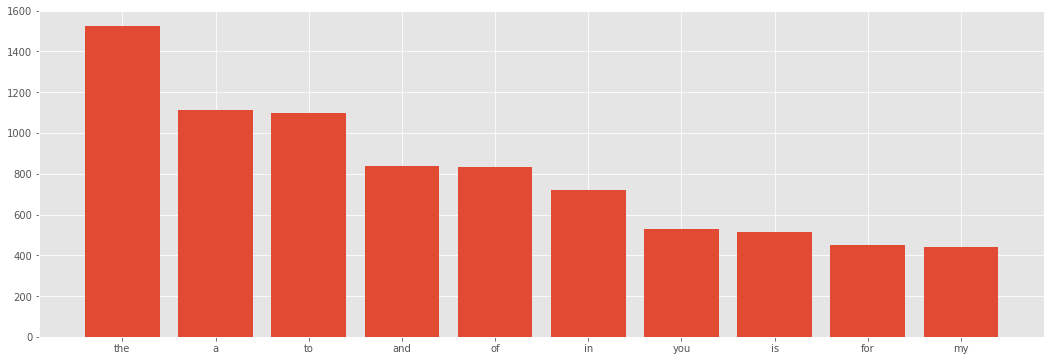

In [18]:
#Analysing texts with label 0
plt.rcParams['figure.figsize'] = (18.0, 6.0)
x,y=zip(*top)
plt.bar(x,y)

<BarContainer object of 10 artists>

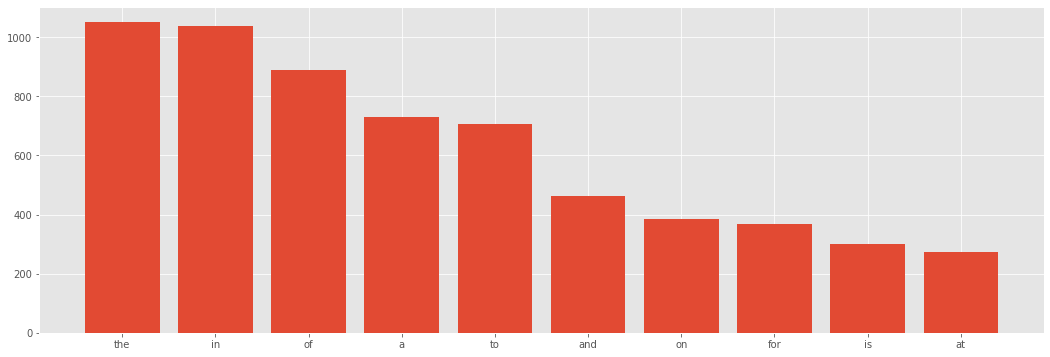

In [19]:
corpus=create_corpus(1) #Analysing tweets with label 1

dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1

top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
    

plt.rcParams['figure.figsize'] = (18.0, 6.0)
x,y=zip(*top)
plt.bar(x,y)

In [22]:
#bigram analysis
def get_top_tweet_bigrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

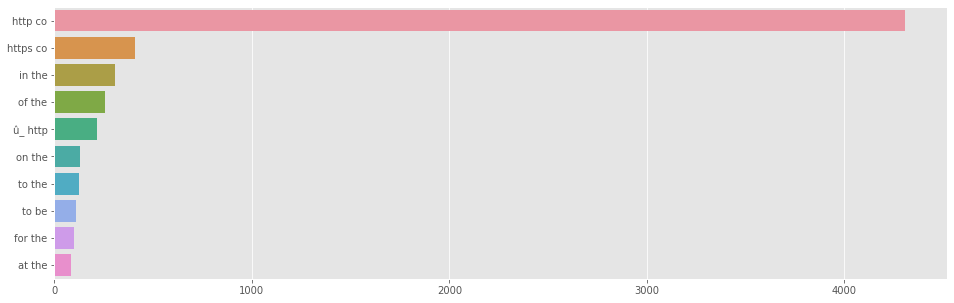

In [24]:
plt.figure(figsize=(16,5))
top_tweet_bigrams=get_top_tweet_bigrams(train_df['text'])[:10]
x,y=map(list,zip(*top_tweet_bigrams))
sns.barplot(x=y,y=x)

In [25]:
y = train_df['target']
train_df.drop(['target'],axis=1,inplace=True)
dataset=pd.concat([train_df,test_df])
dataset.shape

(10876, 5)

In [26]:
dataset.head()

,id,keyword,location,text,length
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,69
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,38
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,133
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",65
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,88


In [27]:
def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)
def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)
def remove_punct(text):
    table=str.maketrans('','',string.punctuation)
    return text.translate(table)

In [28]:
dataset['text'] = dataset['text'].apply(lambda x:remove_URL(x))
dataset['text'] = dataset['text'].apply(lambda x:remove_html(x))
dataset['text'] = dataset['text'].apply(lambda x:remove_emoji(x))
dataset['text'] = dataset['text'].apply(lambda x:remove_punct(x))

(-0.5, 399.5, 199.5, -0.5)

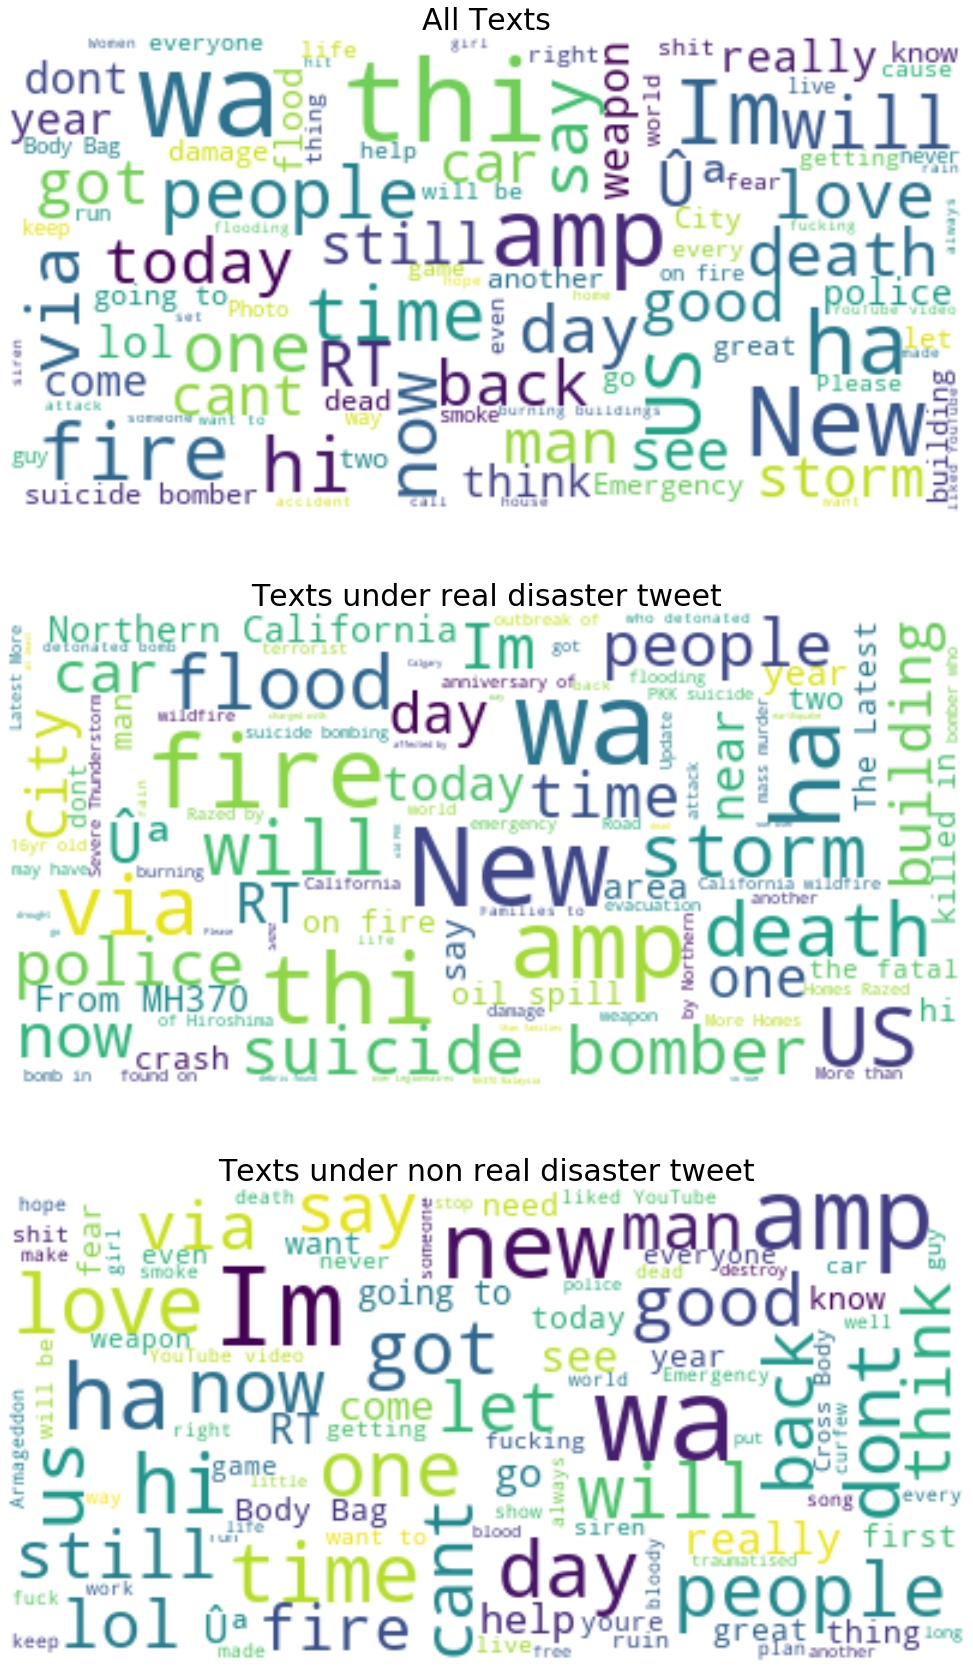

In [31]:
train_data = pd.read_csv('train.csv')
train_data['text'] = train_data['text'].apply(lambda x:remove_URL(x))
train_data['text'] = train_data['text'].apply(lambda x:remove_html(x))
train_data['text'] = train_data['text'].apply(lambda x:remove_emoji(x))
train_data['text'] = train_data['text'].apply(lambda x:remove_punct(x))
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator

df_ADR = train_data[train_data['target']==1]
df_NADR = train_data[train_data['target']==0]
tweet_All = " ".join(review for review in train_data.text)
tweet_ADR = " ".join(review for review in df_ADR.text)
tweet_NADR = " ".join(review for review in df_NADR.text)

fig, ax = plt.subplots(3, 1, figsize  = (30,30))
# Create and generate a word cloud image:
wordcloud_ALL = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_All)
wordcloud_ADR = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_ADR)
wordcloud_NADR = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_NADR)

# Display the generated image:
ax[0].imshow(wordcloud_ALL, interpolation='bilinear')
ax[0].set_title('All Texts', fontsize=30)
ax[0].axis('off')
ax[1].imshow(wordcloud_ADR, interpolation='bilinear')
ax[1].set_title('Texts under real disaster tweet',fontsize=30)
ax[1].axis('off')
ax[2].imshow(wordcloud_NADR, interpolation='bilinear')
ax[2].set_title('Texts under non real disaster tweet',fontsize=30)
ax[2].axis('off')

In [32]:
abbreviations = {
    "$" : " dollar ",
    "€" : " euro ",
    "4ao" : "for adults only",
    "a.m" : "before midday",
    "a3" : "anytime anywhere anyplace",
    "aamof" : "as a matter of fact",
    "acct" : "account",
    "adih" : "another day in hell",
    "afaic" : "as far as i am concerned",
    "afaict" : "as far as i can tell",
    "afaik" : "as far as i know",
    "afair" : "as far as i remember",
    "afk" : "away from keyboard",
    "app" : "application",
    "approx" : "approximately",
    "apps" : "applications",
    "asap" : "as soon as possible",
    "asl" : "age, sex, location",
    "atk" : "at the keyboard",
    "ave." : "avenue",
    "aymm" : "are you my mother",
    "ayor" : "at your own risk", 
    "b&b" : "bed and breakfast",
    "b+b" : "bed and breakfast",
    "b.c" : "before christ",
    "b2b" : "business to business",
    "b2c" : "business to customer",
    "b4" : "before",
    "b4n" : "bye for now",
    "b@u" : "back at you",
    "bae" : "before anyone else",
    "bak" : "back at keyboard",
    "bbbg" : "bye bye be good",
    "bbc" : "british broadcasting corporation",
    "bbias" : "be back in a second",
    "bbl" : "be back later",
    "bbs" : "be back soon",
    "be4" : "before",
    "bfn" : "bye for now",
    "blvd" : "boulevard",
    "bout" : "about",
    "brb" : "be right back",
    "bros" : "brothers",
    "brt" : "be right there",
    "bsaaw" : "big smile and a wink",
    "btw" : "by the way",
    "bwl" : "bursting with laughter",
    "c/o" : "care of",
    "cet" : "central european time",
    "cf" : "compare",
    "cia" : "central intelligence agency",
    "csl" : "can not stop laughing",
    "cu" : "see you",
    "cul8r" : "see you later",
    "cv" : "curriculum vitae",
    "cwot" : "complete waste of time",
    "cya" : "see you",
    "cyt" : "see you tomorrow",
    "dae" : "does anyone else",
    "dbmib" : "do not bother me i am busy",
    "diy" : "do it yourself",
    "dm" : "direct message",
    "dwh" : "during work hours",
    "e123" : "easy as one two three",
    "eet" : "eastern european time",
    "eg" : "example",
    "embm" : "early morning business meeting",
    "encl" : "enclosed",
    "encl." : "enclosed",
    "etc" : "and so on",
    "faq" : "frequently asked questions",
    "fawc" : "for anyone who cares",
    "fb" : "facebook",
    "fc" : "fingers crossed",
    "fig" : "figure",
    "fimh" : "forever in my heart", 
    "ft." : "feet",
    "ft" : "featuring",
    "ftl" : "for the loss",
    "ftw" : "for the win",
    "fwiw" : "for what it is worth",
    "fyi" : "for your information",
    "g9" : "genius",
    "gahoy" : "get a hold of yourself",
    "gal" : "get a life",
    "gcse" : "general certificate of secondary education",
    "gfn" : "gone for now",
    "gg" : "good game",
    "gl" : "good luck",
    "glhf" : "good luck have fun",
    "gmt" : "greenwich mean time",
    "gmta" : "great minds think alike",
    "gn" : "good night",
    "g.o.a.t" : "greatest of all time",
    "goat" : "greatest of all time",
    "goi" : "get over it",
    "gps" : "global positioning system",
    "gr8" : "great",
    "gratz" : "congratulations",
    "gyal" : "girl",
    "h&c" : "hot and cold",
    "hp" : "horsepower",
    "hr" : "hour",
    "hrh" : "his royal highness",
    "ht" : "height",
    "ibrb" : "i will be right back",
    "ic" : "i see",
    "icq" : "i seek you",
    "icymi" : "in case you missed it",
    "idc" : "i do not care",
    "idgadf" : "i do not give a damn fuck",
    "idgaf" : "i do not give a fuck",
    "idk" : "i do not know",
    "ie" : "that is",
    "i.e" : "that is",
    "ifyp" : "i feel your pain",
    "IG" : "instagram",
    "iirc" : "if i remember correctly",
    "ilu" : "i love you",
    "ily" : "i love you",
    "imho" : "in my humble opinion",
    "imo" : "in my opinion",
    "imu" : "i miss you",
    "iow" : "in other words",
    "irl" : "in real life",
    "j4f" : "just for fun",
    "jic" : "just in case",
    "jk" : "just kidding",
    "jsyk" : "just so you know",
    "l8r" : "later",
    "lb" : "pound",
    "lbs" : "pounds",
    "ldr" : "long distance relationship",
    "lmao" : "laugh my ass off",
    "lmfao" : "laugh my fucking ass off",
    "lol" : "laughing out loud",
    "ltd" : "limited",
    "ltns" : "long time no see",
    "m8" : "mate",
    "mf" : "motherfucker",
    "mfs" : "motherfuckers",
    "mfw" : "my face when",
    "mofo" : "motherfucker",
    "mph" : "miles per hour",
    "mr" : "mister",
    "mrw" : "my reaction when",
    "ms" : "miss",
    "mte" : "my thoughts exactly",
    "nagi" : "not a good idea",
    "nbc" : "national broadcasting company",
    "nbd" : "not big deal",
    "nfs" : "not for sale",
    "ngl" : "not going to lie",
    "nhs" : "national health service",
    "nrn" : "no reply necessary",
    "nsfl" : "not safe for life",
    "nsfw" : "not safe for work",
    "nth" : "nice to have",
    "nvr" : "never",
    "nyc" : "new york city",
    "oc" : "original content",
    "og" : "original",
    "ohp" : "overhead projector",
    "oic" : "oh i see",
    "omdb" : "over my dead body",
    "omg" : "oh my god",
    "omw" : "on my way",
    "p.a" : "per annum",
    "p.m" : "after midday",
    "pm" : "prime minister",
    "poc" : "people of color",
    "pov" : "point of view",
    "pp" : "pages",
    "ppl" : "people",
    "prw" : "parents are watching",
    "ps" : "postscript",
    "pt" : "point",
    "ptb" : "please text back",
    "pto" : "please turn over",
    "qpsa" : "what happens", #"que pasa",
    "ratchet" : "rude",
    "rbtl" : "read between the lines",
    "rlrt" : "real life retweet", 
    "rofl" : "rolling on the floor laughing",
    "roflol" : "rolling on the floor laughing out loud",
    "rotflmao" : "rolling on the floor laughing my ass off",
    "rt" : "retweet",
    "ruok" : "are you ok",
    "sfw" : "safe for work",
    "sk8" : "skate",
    "smh" : "shake my head",
    "sq" : "square",
    "srsly" : "seriously", 
    "ssdd" : "same stuff different day",
    "tbh" : "to be honest",
    "tbs" : "tablespooful",
    "tbsp" : "tablespooful",
    "tfw" : "that feeling when",
    "thks" : "thank you",
    "tho" : "though",
    "thx" : "thank you",
    "tia" : "thanks in advance",
    "til" : "today i learned",
    "tl;dr" : "too long i did not read",
    "tldr" : "too long i did not read",
    "tmb" : "tweet me back",
    "tntl" : "trying not to laugh",
    "ttyl" : "talk to you later",
    "u" : "you",
    "u2" : "you too",
    "u4e" : "yours for ever",
    "utc" : "coordinated universal time",
    "w/" : "with",
    "w/o" : "without",
    "w8" : "wait",
    "wassup" : "what is up",
    "wb" : "welcome back",
    "wtf" : "what the fuck",
    "wtg" : "way to go",
    "wtpa" : "where the party at",
    "wuf" : "where are you from",
    "wuzup" : "what is up",
    "wywh" : "wish you were here",
    "yd" : "yard",
    "ygtr" : "you got that right",
    "ynk" : "you never know",
    "zzz" : "sleeping bored and tired"
}
def convert_abbrev(word):
    return abbreviations[word.lower()] if word.lower() in abbreviations.keys() else word
def convert_abbrev_in_text(text):
    tokens = word_tokenize(text)
    tokens = [convert_abbrev(word) for word in tokens]
    text = ' '.join(tokens)
    return text
dataset['text'] = dataset['text'].apply(lambda x:convert_abbrev_in_text(x))

In [33]:
def clean_tweets(tweet):
    """Removes links and non-ASCII characters"""
    
    tweet = ''.join([x for x in tweet if x in string.printable])
    
    # Removing URLs
    tweet = re.sub(r"http\S+", "", tweet)
    
    return tweet
dataset['text'] = dataset['text'].apply(lambda x:clean_tweets(x))

In [36]:
train_data['id'].unique()

array([    1,     4,     5, ..., 10871, 10872, 10873], dtype=int64)

In [37]:
ids_with_target_error = [328,443,513,2619,3640,3900,4342,5781,6552,6554,6570,6701,6702,6729,6861,7226] #some targets were mislabled
train_data.loc[train_data['id'].isin(ids_with_target_error),'target'] = 0
train_data[train_data['id'].isin(ids_with_target_error)]

,id,keyword,location,text,target
229,328,annihilated,NaN,Ready to get annihilated for the BUCS game,0
301,443,apocalypse,NaN,Short Reading\n\nApocalypse 211023 \n\nIn the ...,0
356,513,army,Studio,But if you build an army of 100 dogs and their...,0
1822,2619,crashed,NaN,My iPod crashed \nWeLoveYouLouis \nMTVHottest ...,0
2536,3640,desolation,"Quilmes , Arg",This desperation dislocation\nSeparation conde...,0
2715,3900,devastated,PG Chillin!,Man Currensy really be talkin that talk Id be ...,0
3024,4342,dust%20storm,chicago,Going to a fest Bring swimming goggles for the...,0
4068,5781,forest%20fires,NaN,Campsite recommendations \nToilets shower \nPu...,0
4609,6552,injury,Saint Paul,My prediction for the Vikings game this Sunday...,0
4611,6554,injury,NaN,Dante Exums knee injury could stem Jazzs hoped...,0


In [44]:
y = train_data['target'] #updating the corrected y

In [45]:
from sklearn.pipeline import Pipeline #Again trying after reformed text cleaning
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
texts_pipeline = Pipeline([('CVec', CountVectorizer(lowercase=True,stop_words='english')),
                     ('Tfidf', TfidfTransformer())])
text_counts= texts_pipeline.fit_transform(dataset['text']) 

In [46]:
X = text_counts[:len(train_df)]
test = text_counts[len(train_df):]
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=0)


In [48]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [52]:
multi = MultinomialNB(alpha=0.75)
multi.fit(X_train,y_train)
y_multi = multi.predict(X_test)
print(f1_score(y_test,y_multi))
print(accuracy_score(y_test,y_multi))

0.7301808066759389
0.7962184873949579


In [53]:
log = LogisticRegression()
log.fit(X_train,y_train)
y_log = log.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_log))
print("F1_score:",f1_score(y_test, y_log))

Accuracy: 0.8051470588235294
F1_score: 0.7270051508462104


In [54]:
svc = SVC(kernel='linear')
svc.fit(X_train,y_train)
y_svc = svc.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_svc))
print("F1_score:",f1_score(y_test, y_svc))

Accuracy: 0.8040966386554622
F1_score: 0.7375087966220971


In [55]:
svc = SVC()
svc.fit(X_train,y_train)
y_svc = svc.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_svc))
print("F1_score:",f1_score(y_test, y_svc))

Accuracy: 0.7988445378151261
F1_score: 0.7105064247921391


In [56]:
rfr = RandomForestClassifier()
rfr.fit(X_train,y_train)
y_rfr = rfr.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_rfr))
print("F1_score:",f1_score(y_test, y_rfr))

Accuracy: 0.7977941176470589
F1_score: 0.7187728268809348


In [58]:
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier()
lgbm.fit(X_train,y_train)
y_lgbm = lgbm.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_lgbm))
print("F1_score:",f1_score(y_test, y_lgbm))

Accuracy: 0.7841386554621849
F1_score: 0.7095406360424029


In [59]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)
y_mlp = mlp.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_mlp))
print("F1_score:",f1_score(y_test, y_mlp))

Accuracy: 0.770483193277311
F1_score: 0.712689020381328


In [61]:
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts= cv.fit_transform(dataset['text']) #transforming the dataset

In [62]:
X = text_counts[:len(train_df)]
test = text_counts[len(train_df):]
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=0)

In [63]:
multi = MultinomialNB(alpha=0.75)
multi.fit(X_train,y_train)
y_multi = multi.predict(X_test)
print(f1_score(y_test,y_multi))
print(accuracy_score(y_test,y_multi))

0.747209455022981
0.7977941176470589


In [64]:
log = LogisticRegression()
log.fit(X_train,y_train)
y_log = log.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_log))
print("F1_score:",f1_score(y_test, y_log))

Accuracy: 0.8130252100840336
F1_score: 0.7561643835616437


In [65]:
svc = SVC(kernel='linear')
svc.fit(X_train,y_train)
y_svc = svc.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_svc))
print("F1_score:",f1_score(y_test, y_svc))

Accuracy: 0.7841386554621849
F1_score: 0.7258172114743161


In [66]:
svc = SVC()
svc.fit(X_train,y_train)
y_svc = svc.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_svc))
print("F1_score:",f1_score(y_test, y_svc))

Accuracy: 0.8103991596638656
F1_score: 0.736688548504741


In [67]:
rfr = RandomForestClassifier()
rfr.fit(X_train,y_train)
y_rfr = rfr.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_rfr))
print("F1_score:",f1_score(y_test, y_rfr))

Accuracy: 0.7962184873949579
F1_score: 0.7259887005649717


In [69]:
from sklearn.metrics import confusion_matrix
# Showing Confusion Matrix
def plot_cm(y_true, y_pred, title, figsize=(5,5)):
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_true), columns=np.unique(y_true))
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    plt.title(title)
    sns.heatmap(cm, cmap= "YlGnBu", annot=annot, fmt='', ax=ax)

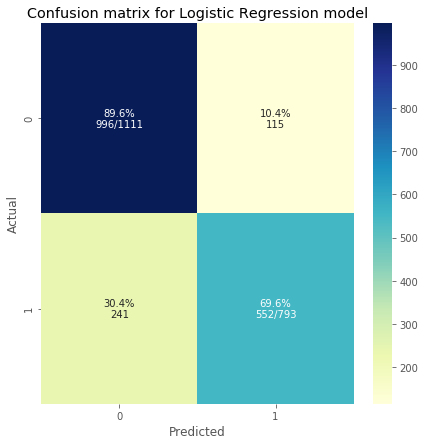

In [70]:
# Showing Confusion Matrix for log model
plot_cm(y_test, y_log, 'Confusion matrix for Logistic Regression model', figsize=(7,7))


In [71]:
log.fit(X,y)
y_pred = log.predict(test)
submit6 = pd.DataFrame(test_df['id'])
submit6['target'] = y_pred
submit6.to_csv('submit6.csv',index=False)
submit6.head()

,id,target
0,0,1
1,2,1
2,3,1
3,9,1
4,11,1


In [72]:
submit6.head(10)

,id,target
0,0,1
1,2,1
2,3,1
3,9,1
4,11,1
5,12,1
6,21,0
7,22,0
8,27,0
9,29,0
